# Customer churn for idea. company

####  The main goal of the examination for churn in media sector Idea which is India’s biggest telecom operator. Churn, it is the number one topic for Telco’s around the world.

##### Using pandas library to load the data set.


In [24]:
import pandas as pd

In [25]:
df = pd.read_csv(r"C:\Users\ImLaleeth\Desktop\Churn.csv")

In [83]:
df.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


#### As observed the data set has 18 columns and 5000 rows with zero null values
.

In [84]:
df.shape

(5000, 18)

In [85]:
df.isnull().count()

churn                         5000
accountlength                 5000
internationalplan             5000
voicemailplan                 5000
numbervmailmessages           5000
totaldayminutes               5000
totaldaycalls                 5000
totaldaycharge                5000
totaleveminutes               5000
totalevecalls                 5000
totalevecharge                5000
totalnightminutes             5000
totalnightcalls               5000
totalnightcharge              5000
totalintlminutes              5000
totalintlcalls                5000
totalintlcharge               5000
numbercustomerservicecalls    5000
dtype: int64

### Dividing the data into two for training and testing.

In [66]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling Train class: ' + str(data.shape))
print('Data for Test class: ' + str(data_unseen.shape))

Data for Modeling Train class: (4750, 18)
Data for Test class: (250, 18)


#### Pycaret as library we use this for drawing insights and check accuracy of the models.

In [65]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'churn', session_id=123)

,Description,Value
0,session_id,123
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(5000, 18)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [73]:
df.head(1)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1


## Using seaborn for correlation between the features.

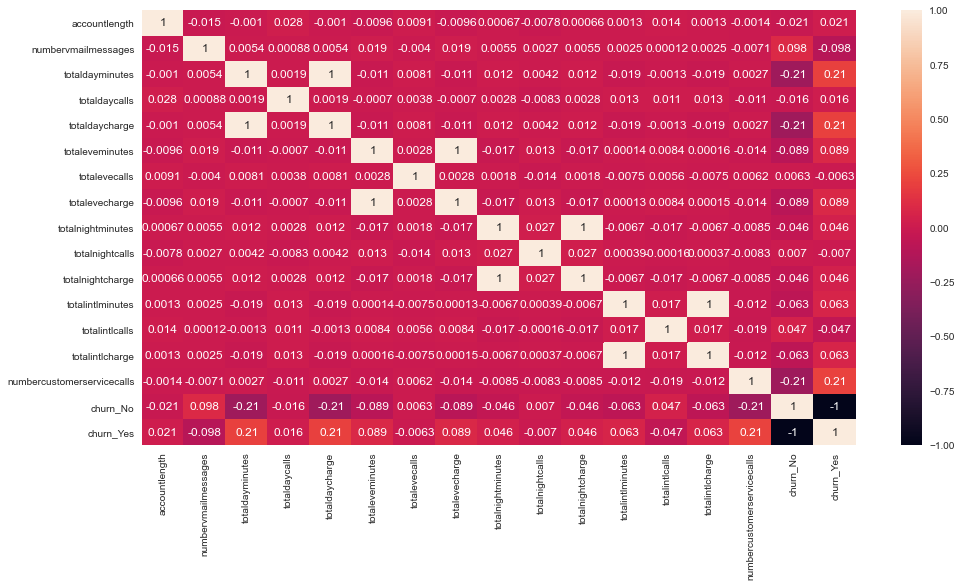

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (16,8))
heat = data1.corr()
sns.heatmap(heat,annot = True);

In [69]:
data1 = pd.get_dummies(df,columns=['internationalplan','voicemailplan'])
data1.head()

,churn,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes
0,No,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0,1
1,No,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0,1
2,No,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,1,0
3,No,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,1,0
4,No,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,1,0


In [108]:
dt = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9629,0.9560,0.7347,1.0000,0.8471,0.8265,0.8392
1,0.9629,0.9152,0.8163,0.9091,0.8602,0.8389,0.8405
2,0.9657,0.9329,0.8163,0.9302,0.8696,0.8499,0.8523
3,0.9514,0.9083,0.6531,1.0000,0.7901,0.7640,0.7862
4,0.9571,0.9212,0.7347,0.9474,0.8276,0.8036,0.8120
5,0.9714,0.9411,0.8571,0.9333,0.8936,0.8771,0.8782
6,0.9543,0.9039,0.7347,0.9231,0.8182,0.7924,0.7992
7,0.9429,0.9141,0.6531,0.9143,0.7619,0.7305,0.7438
8,0.9629,0.9481,0.7551,0.9737,0.8506,0.8298,0.8385
9,0.9370,0.9227,0.6327,0.8857,0.7381,0.7034,0.7163


In [119]:
dt1 = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8943,0.8189,0.7143,0.6034,0.6542,0.5923,0.5953
1,0.8914,0.7916,0.6531,0.6038,0.6275,0.5640,0.5646
2,0.9143,0.8391,0.7347,0.6792,0.7059,0.6558,0.6565
3,0.9229,0.8099,0.6531,0.7619,0.7033,0.6593,0.6619
4,0.8943,0.8275,0.7347,0.6000,0.6606,0.5987,0.6030
5,0.9286,0.8987,0.8571,0.7000,0.7706,0.7289,0.7341
6,0.9257,0.8543,0.7551,0.7255,0.7400,0.6967,0.6969
7,0.8857,0.7627,0.5918,0.5918,0.5918,0.5254,0.5254
8,0.9114,0.8631,0.7959,0.6500,0.7156,0.6638,0.6685
9,0.9054,0.8255,0.7143,0.6481,0.6796,0.6243,0.6253


In [118]:
dt2 = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8743,0.8834,0.3878,0.5758,0.4634,0.3953,0.4052
1,0.8600,0.8498,0.2653,0.5000,0.3467,0.2764,0.2939
2,0.8514,0.8863,0.2245,0.4400,0.2973,0.2239,0.2398
3,0.8686,0.8415,0.1837,0.6000,0.2812,0.2308,0.2805
4,0.8714,0.8156,0.2653,0.5909,0.3662,0.3060,0.3366
5,0.8514,0.8600,0.2041,0.4348,0.2778,0.2068,0.2253
6,0.8686,0.8679,0.4286,0.5385,0.4773,0.4032,0.4067
7,0.8457,0.7999,0.2245,0.4074,0.2895,0.2110,0.2228
8,0.8543,0.8702,0.2041,0.4545,0.2817,0.2134,0.2348
9,0.8481,0.8467,0.3061,0.4412,0.3614,0.2784,0.2844


In [109]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9543,0.9609,0.6735,1.0000,0.8049,0.7801,0.7997
1,0.9571,0.9140,0.7551,0.9250,0.8315,0.8072,0.8127
2,0.9629,0.9271,0.8163,0.9091,0.8602,0.8389,0.8405
3,0.9400,0.9207,0.5918,0.9667,0.7342,0.7025,0.7295
4,0.9429,0.9100,0.6735,0.8919,0.7674,0.7356,0.7450
5,0.9714,0.9378,0.8163,0.9756,0.8889,0.8726,0.8772
6,0.9486,0.9093,0.6939,0.9189,0.7907,0.7620,0.7718
7,0.9343,0.9026,0.6122,0.8824,0.7229,0.6870,0.7018
8,0.9571,0.9555,0.7143,0.9722,0.8235,0.7998,0.8121
9,0.9341,0.9263,0.5918,0.9062,0.7160,0.6806,0.7004


In [120]:
tuned_dt1 = tune_model(dt1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9514,0.9183,0.6939,0.9444,0.8000,0.7731,0.7850
1,0.9371,0.8379,0.6122,0.9091,0.7317,0.6976,0.7151
2,0.9486,0.8944,0.7551,0.8605,0.8043,0.7749,0.7771
3,0.9343,0.8055,0.5918,0.9062,0.7160,0.6807,0.7005
4,0.9343,0.8932,0.6327,0.8611,0.7294,0.6930,0.7037
5,0.9371,0.8504,0.7143,0.8140,0.7609,0.7249,0.7269
6,0.9257,0.8813,0.6122,0.8108,0.6977,0.6563,0.6647
7,0.9257,0.8276,0.5918,0.8286,0.6905,0.6496,0.6615
8,0.9429,0.9144,0.6122,0.9677,0.7500,0.7196,0.7436
9,0.9398,0.9034,0.7551,0.8043,0.7789,0.7442,0.7447


In [121]:
tuned_dt2 = tune_model(dt2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8829,0.7069,0.1633,1.0000,0.2807,0.2513,0.3791
1,0.8714,0.7272,0.0816,1.0000,0.1509,0.1326,0.2665
2,0.8771,0.6548,0.1224,1.0000,0.2182,0.1935,0.3273
3,0.8771,0.6787,0.1224,1.0000,0.2182,0.1935,0.3273
4,0.8714,0.7003,0.1020,0.8333,0.1818,0.1560,0.2639
5,0.8743,0.6842,0.1020,1.0000,0.1852,0.1635,0.2984
6,0.8886,0.6746,0.2041,1.0000,0.3390,0.3060,0.4251
7,0.8629,0.6468,0.0816,0.5714,0.1429,0.1118,0.1776
8,0.8886,0.7211,0.2449,0.8571,0.3810,0.3399,0.4219
9,0.8739,0.7092,0.1020,1.0000,0.1852,0.1634,0.2983


In [110]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [122]:
evaluate_model(tuned_dt1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [123]:
evaluate_model(tuned_dt2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [124]:
predict_model(tuned_dt);
predict_model(tuned_dt1);
predict_model(tuned_dt2);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9514,0.9120,0.6866,0.9675,0.8032,0.7764,0.7913


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9354,0.8650,0.6175,0.9054,0.7342,0.6990,0.7156


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8714,0.6833,0.1198,0.9286,0.2122,0.1853,0.3074


In [112]:
final_dt = finalize_model(tuned_dt)

In [113]:

unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,Label,Score
0,No,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,No,0.9289
1,No,74,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,No,0.9668
2,No,95,no,no,0,156.6,88,26.62,247.6,75,21.05,192.3,115,8.65,12.3,5,3.32,3,No,0.9644
3,No,76,no,yes,33,189.7,66,32.25,212.8,65,18.09,165.7,108,7.46,10.0,5,2.70,1,No,0.9667
4,Yes,121,no,yes,30,198.4,129,33.73,75.3,77,6.40,181.2,77,8.15,5.8,3,1.57,3,No,0.9587


In [114]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['churn'], unseen_predictions['Label'], metric = 'Accuracy')

0.944